In [1]:


import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [2]:
!ls

 clean_tweet.csv		  'feature_normal_tfidf_algo_comp(2).ipynb'
 clean_tweet_subc_withuser.csv	   preprop
 clean_tweet_subc_withuser_f.csv   term_freq_df.csv
'data_vis(1).ipynb'		   train_clean.csv


In [3]:
csv = 'clean_tweet_subc_withuser.csv'
my_df = pd.read_csv(csv)
my_df.head()

,id,text,subc
0,90194,user user go home you re drunk user,0
1,97670,user liberals are all kookoo,1
2,52415,user was literally just talking about this lol...,2
3,13384,user canada doesn need another cuck we already...,0
4,28414,user you are lying corrupt traitor nobody want...,0


In [4]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3876 entries, 0 to 3875
Data columns (total 3 columns):
id      3876 non-null int64
text    3876 non-null object
subc    3876 non-null int64
dtypes: int64(2), object(1)
memory usage: 90.9+ KB


In [5]:
len(my_df.text)

3876

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df['text'].values.astype('U'))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
len(cvec.get_feature_names())

8932

In [9]:
neg_doc_matrix = cvec.transform(my_df[my_df.subc == 0].text.values.astype('U'))
pos_doc_matrix = cvec.transform(my_df[my_df.subc == 1].text.values.astype('U'))
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()


In [10]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]


,negative,positive,total
user,4590,829,5419
the,1556,364,1920
is,1517,187,1704
to,1188,203,1391
you,1208,149,1357
and,957,184,1141
he,880,55,935
of,657,160,817
are,614,110,724
that,601,115,716



# Zipf's Law

Zipf's Law is first presented by French stenographer Jean-Baptiste Estoup and later named after the American linguist George Kingsley Zipf. Zipf's Law states that a small number of words are used all the time, while the vast majority are used very rarely. There is nothing surprising about this, we know that we use some of the words very frequently, such as "the", "of", etc, and we rarely use the words like "aardvark" (aardvark is an animal species native to Africa). However, what's interesting is that "given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc."

In other words, the rth most frequent word has a frequency f(r) that scales according to $${f(r)} \propto \frac{1}{r^\alpha}$$ for $$\alpha \approx {1}$$

Let's see how the tweet tokens and their frequencies look like on a plot.


Text(0.5,1,'Top 500 tokens in tweets')

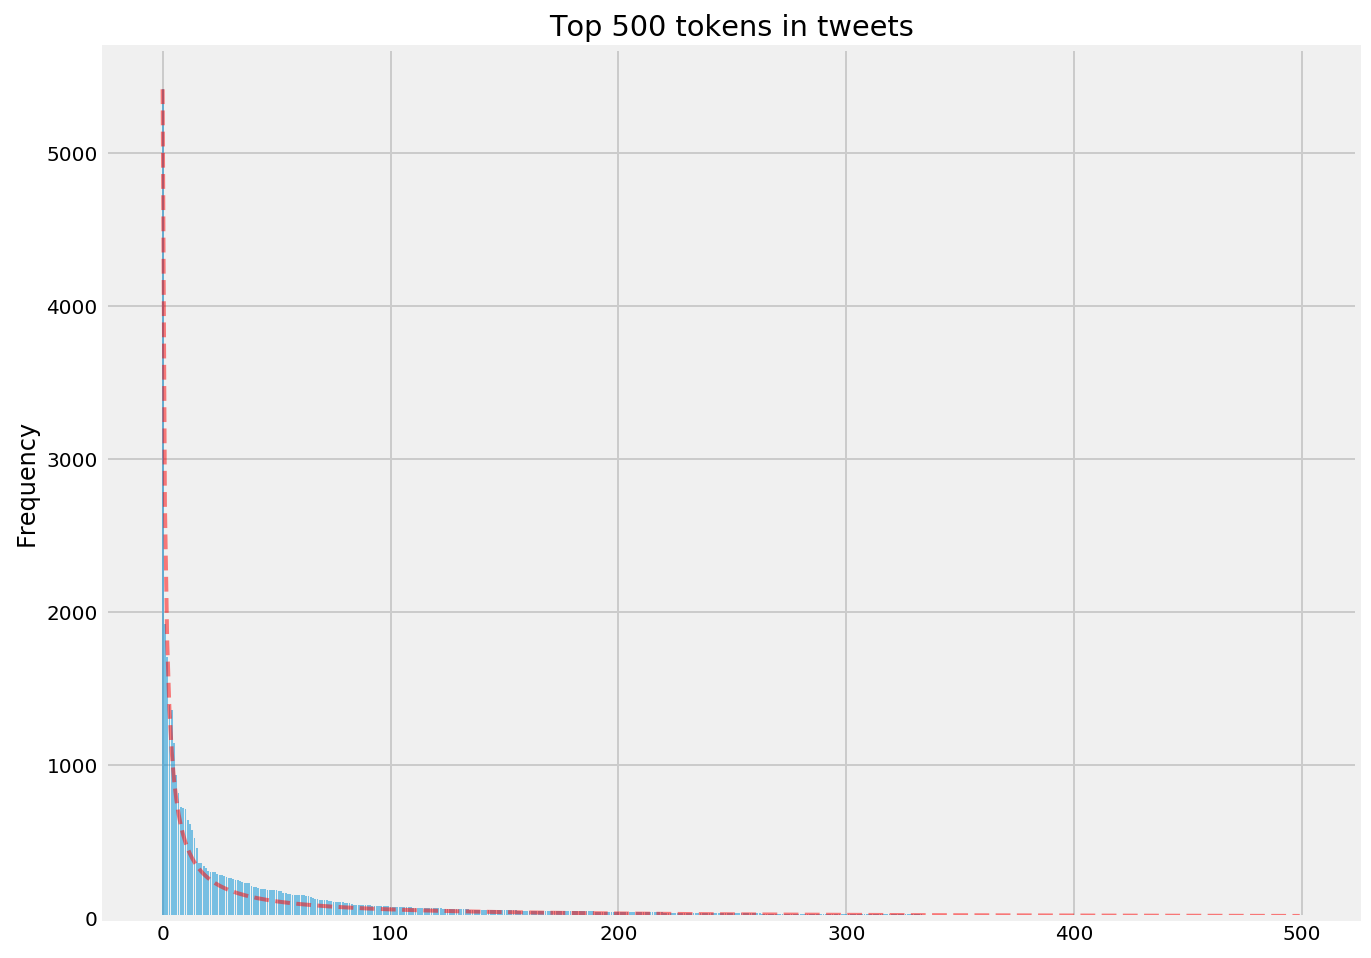

In [11]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')


In [12]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")


ValueError: Image size of 1123x109435 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 576x432 with 1 Axes>

In [13]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')

In [19]:
term_freq_df = pd.read_csv('term_freq_df.csv',index_col=0, encoding='utf_8')


In [22]:
document_matrix = cvec.transform(my_df['text'].values.astype('U'))


In [23]:
%%time
neg_batches = np.linspace(0,6620,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1


735 entries' term freuquency calculated
1471 entries' term freuquency calculated
2206 entries' term freuquency calculated
2942 entries' term freuquency calculated
3677 entries' term freuquency calculated
4413 entries' term freuquency calculated
5148 entries' term freuquency calculated
5884 entries' term freuquency calculated
6620 entries' term freuquency calculated
CPU times: user 324 ms, sys: 340 ms, total: 664 ms
Wall time: 657 ms


In [24]:
%%time
pos_batches = np.linspace(6620,13239,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1


7355 entries' term freuquency calculated
8090 entries' term freuquency calculated
8826 entries' term freuquency calculated
9561 entries' term freuquency calculated
10297 entries' term freuquency calculated
11032 entries' term freuquency calculated
11768 entries' term freuquency calculated
12503 entries' term freuquency calculated
13239 entries' term freuquency calculated
CPU times: user 233 ms, sys: 378 ms, total: 611 ms
Wall time: 622 ms


In [25]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
the,4503,4571,9074
is,3353,3291,6644
to,3157,3162,6319
you,2739,2747,5486
and,2546,2627,5173
of,1947,1887,3834
are,1824,1830,3654
he,1608,1517,3125
that,1495,1552,3047
not,1511,1451,2962


Text(0.5,1,'Top 50 tokens in negative tweets')

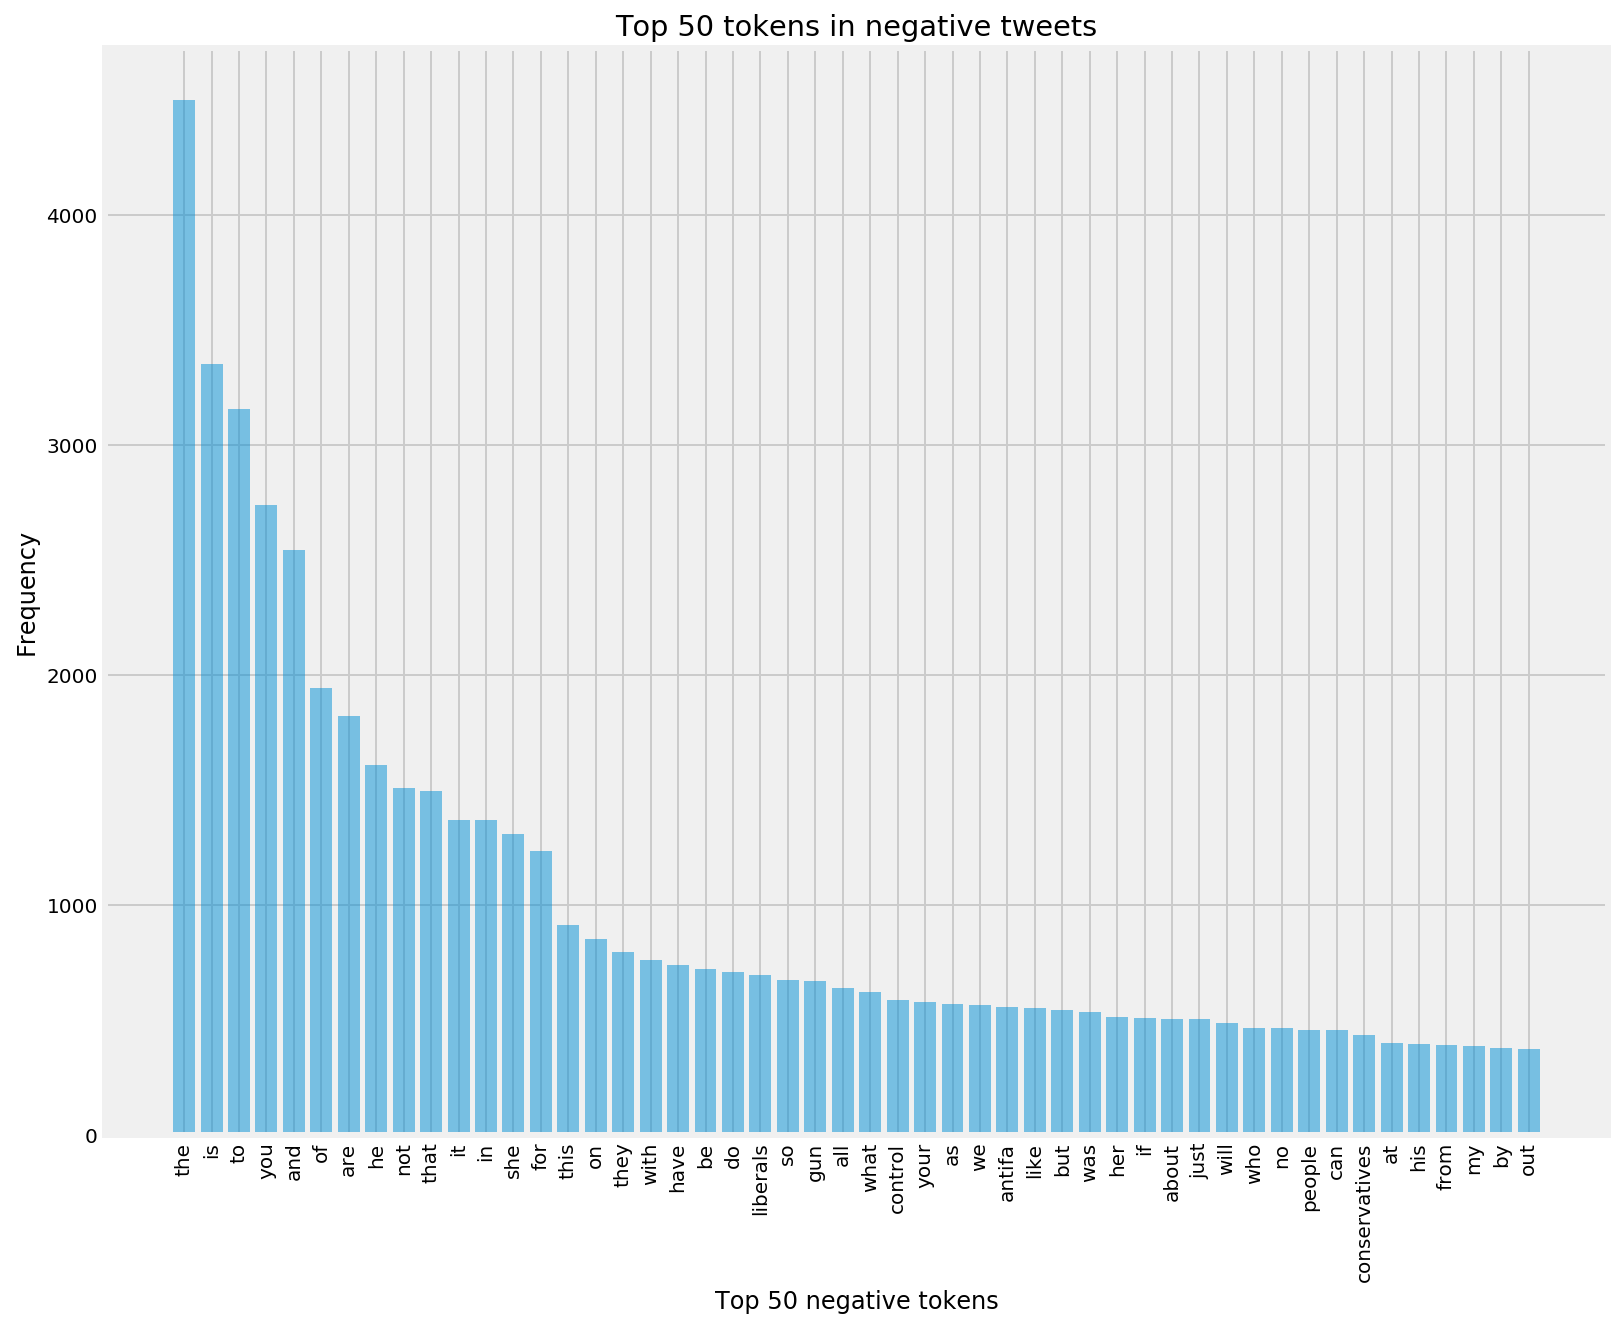

In [26]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5,1,'Top 50 tokens in positive tweets')

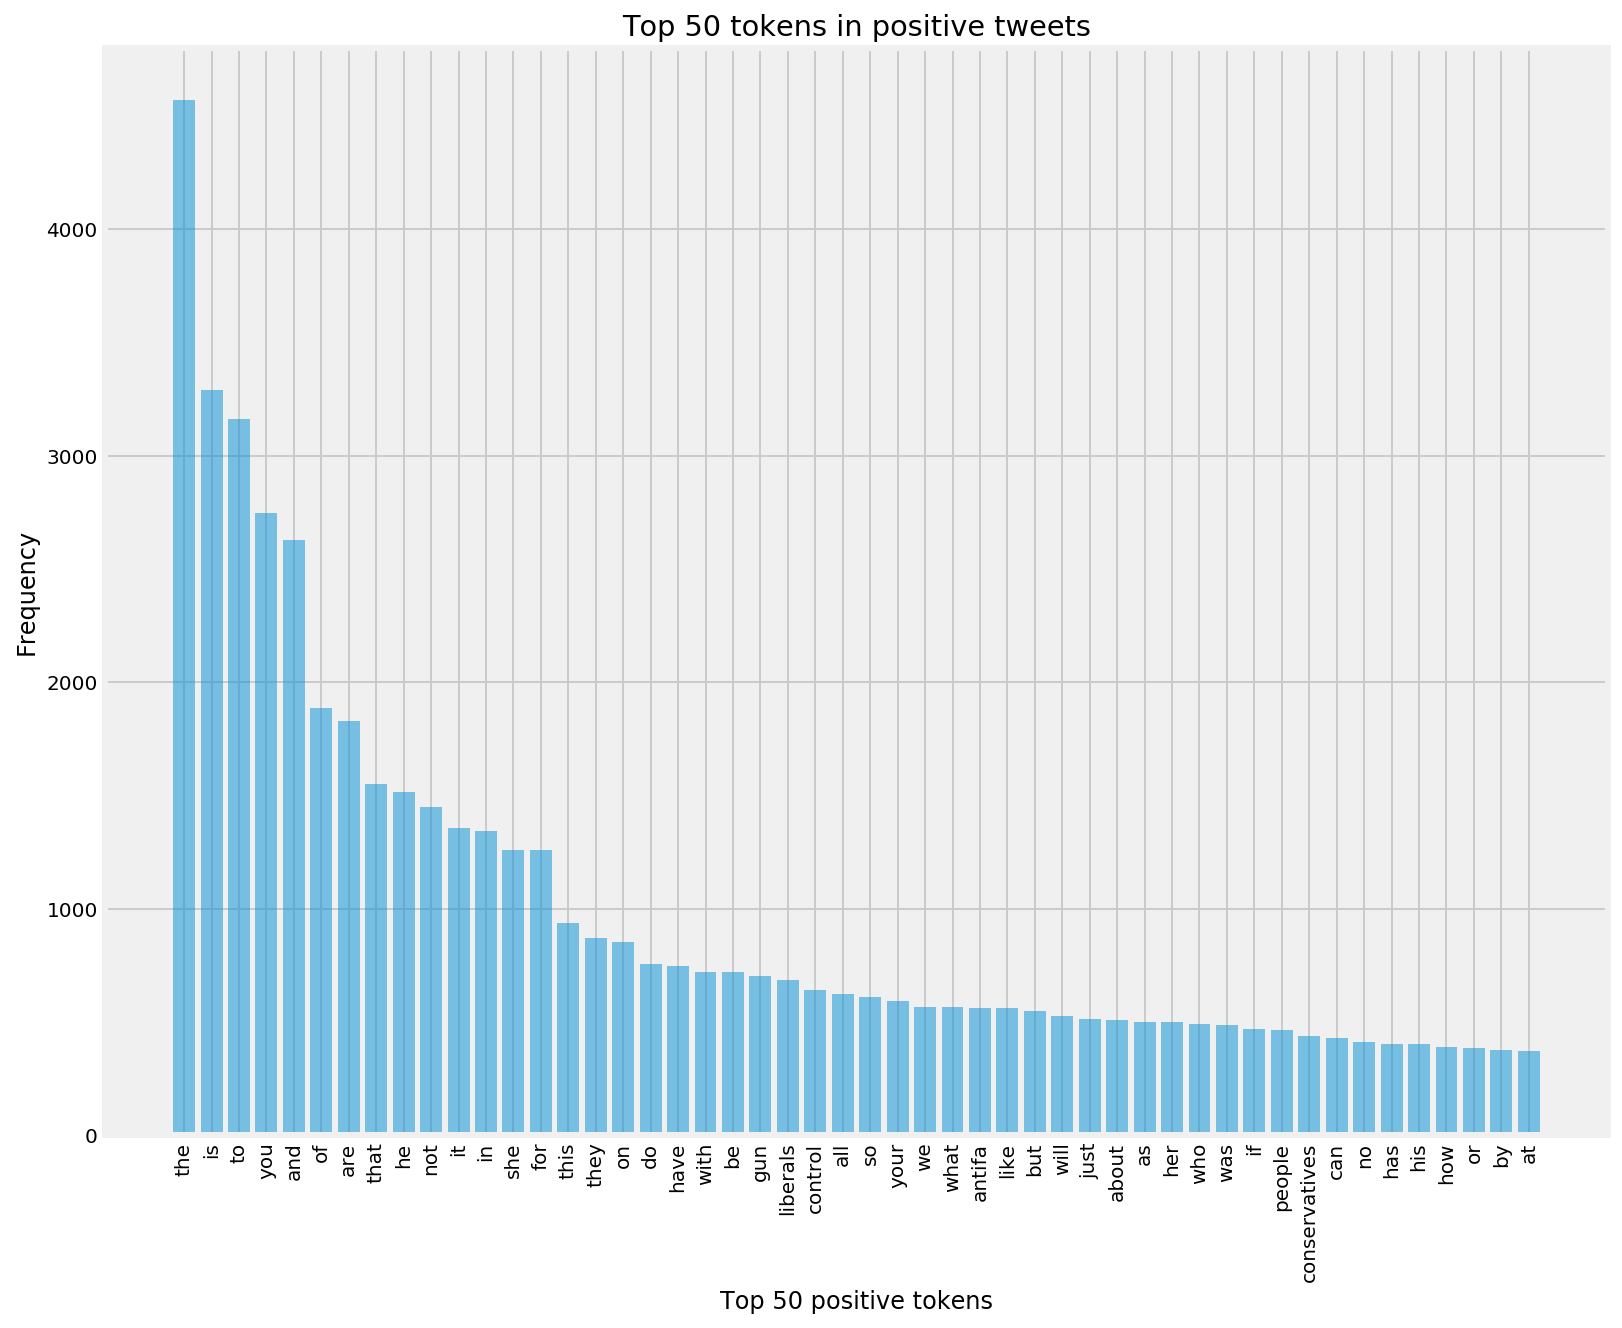

In [27]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5,1,'Negative Frequency vs Positive Frequency')

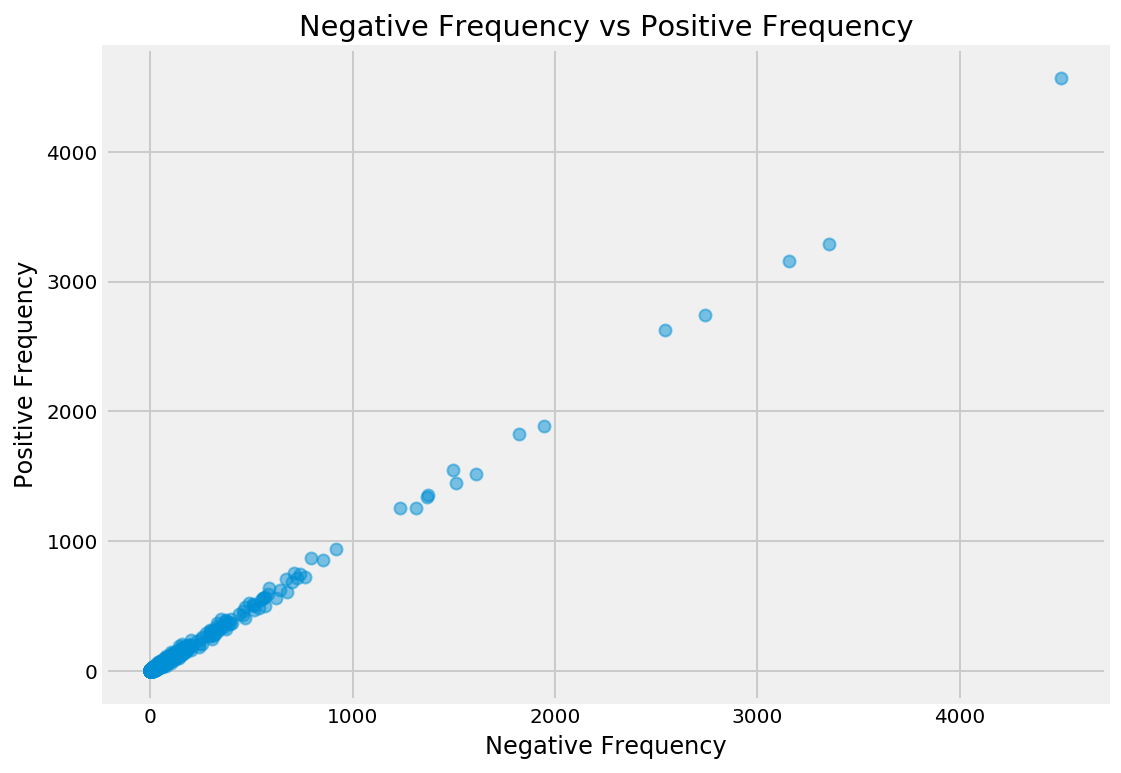

In [28]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [31]:
! pip install textblob

    100% |████████████████████████████████| 645kB 346kB/s ta 0:00:01    93% |█████████████████████████████▉  | 593kB 391kB/s eta 0:00:01
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [32]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
